In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

#from tensorflow.keras.callbacks import ModelCheckpoint 
#from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

#seed set
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv("C:/sourceTree/DataScience/ICT/Py_Project/20201207-day36/housing.csv",delim_whitespace=True, header=None)
#1행의 셀에 해당 정보를 모두 입력하기에  화이트 스페스로 구분할 수 있따.
#이번에는 속성에 대한 알려주는 정보가 없어 파악도 쉽지않지.(한 마디로 클래스로 별도 구분이 없어서 어느게 결과인지 아는게 쉽지않다)

In [2]:
df = df_pre.sample(frac=1)
#선생님과 100% 똑같은 결과를 얻을 수는 없다. 왜냐면 데이터를 섞고 랜덤으로 뽑았기 때문.
#학습용으로 쓰는 데이터의 경우 대부분 잘 정렬되어 있는 경우들이 많다.
#이 때문에 일부러 섞는 

dataset= df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=seed)

In [3]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1)) #소프트맥스 등을 활용 않는 이유는
#선형회귀 데이터는 참과 거짓을 구분할 필요가 없기에 활성화 함수를 지정할 필요가 없게 된 것이다.

In [4]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import EarlyStopping

#학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=50)
#monitor = 'val_loss' :val_loss의 값을 기준으로 해서 멈춤여부를 정하겠어.(횟수는 patience에서 설정)
# patience=100 : 100번까지는 오차가 줄지 않아도 봐줄게. 하지만 101번 째에도 오차가 안줄면 학습을 멈출거야!

#모델 저장 조건 설정.
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

#모델 저장조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5" #파일저장경로 & 저장형식까지 설정.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) 

#모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5000, batch_size=10,
                    callbacks=[early_stopping_callback, checkpointer]) 

Epoch 1/5000
 1/24 [>.............................] - ETA: 0s - loss: 15427.5596
Epoch 00001: val_loss improved from inf to 3399.11548, saving model to ./model\01-3399.1155.hdf5
24/24 [==============================] - 0s 6ms/step - loss: 10934.6416 - val_loss: 3399.1155
Epoch 2/5000
 1/24 [>.............................] - ETA: 0s - loss: 4183.1357
Epoch 00002: val_loss improved from 3399.11548 to 613.56659, saving model to ./model\02-613.5666.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 1448.8400 - val_loss: 613.5666
Epoch 3/5000
 1/24 [>.............................] - ETA: 0s - loss: 567.8027
Epoch 00003: val_loss improved from 613.56659 to 500.07983, saving model to ./model\03-500.0798.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 584.2853 - val_loss: 500.0798
Epoch 4/5000
 1/24 [>.............................] - ETA: 0s - loss: 626.6561
Epoch 00004: val_loss improved from 500.07983 to 431.50925, saving model to ./model\04-431.5092.hdf5
24/

Epoch 32/5000
 1/24 [>.............................] - ETA: 0s - loss: 49.7522
Epoch 00032: val_loss improved from 54.03405 to 53.57740, saving model to ./model\32-53.5774.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 57.5525 - val_loss: 53.5774
Epoch 33/5000
 1/24 [>.............................] - ETA: 0s - loss: 20.6440
Epoch 00033: val_loss improved from 53.57740 to 51.40580, saving model to ./model\33-51.4058.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 58.0074 - val_loss: 51.4058
Epoch 34/5000
 1/24 [>.............................] - ETA: 0s - loss: 102.4218
Epoch 00034: val_loss did not improve from 51.40580
24/24 [==============================] - 0s 1ms/step - loss: 56.8607 - val_loss: 52.0887
Epoch 35/5000
 1/24 [>.............................] - ETA: 0s - loss: 10.5958
Epoch 00035: val_loss improved from 51.40580 to 50.37891, saving model to ./model\35-50.3789.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 55.3811 -

 1/24 [>.............................] - ETA: 0s - loss: 18.7837
Epoch 00065: val_loss did not improve from 41.01252
24/24 [==============================] - 0s 1ms/step - loss: 44.5384 - val_loss: 43.7124
Epoch 66/5000
 1/24 [>.............................] - ETA: 0s - loss: 35.0192
Epoch 00066: val_loss improved from 41.01252 to 40.38783, saving model to ./model\66-40.3878.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 43.9551 - val_loss: 40.3878
Epoch 67/5000
 1/24 [>.............................] - ETA: 0s - loss: 5.6677
Epoch 00067: val_loss did not improve from 40.38783
24/24 [==============================] - 0s 1ms/step - loss: 43.3283 - val_loss: 42.5698
Epoch 68/5000
 1/24 [>.............................] - ETA: 0s - loss: 47.9958
Epoch 00068: val_loss improved from 40.38783 to 39.87967, saving model to ./model\68-39.8797.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 45.0084 - val_loss: 39.8797
Epoch 69/5000
 1/24 [>.....................

Epoch 00098: val_loss did not improve from 31.87616
24/24 [==============================] - 0s 1ms/step - loss: 34.3007 - val_loss: 32.9530
Epoch 99/5000
 1/24 [>.............................] - ETA: 0s - loss: 25.4355
Epoch 00099: val_loss did not improve from 31.87616
24/24 [==============================] - 0s 1ms/step - loss: 34.7788 - val_loss: 33.6757
Epoch 100/5000
 1/24 [>.............................] - ETA: 0s - loss: 46.0442
Epoch 00100: val_loss did not improve from 31.87616
24/24 [==============================] - 0s 1ms/step - loss: 38.7964 - val_loss: 37.9010
Epoch 101/5000
 1/24 [>.............................] - ETA: 0s - loss: 24.8788
Epoch 00101: val_loss improved from 31.87616 to 31.41117, saving model to ./model\101-31.4112.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 34.0167 - val_loss: 31.4112
Epoch 102/5000
 1/24 [>.............................] - ETA: 0s - loss: 9.7939
Epoch 00102: val_loss improved from 31.41117 to 31.24121, saving model 

Epoch 133/5000
 1/24 [>.............................] - ETA: 0s - loss: 49.7382
Epoch 00133: val_loss did not improve from 26.74933
24/24 [==============================] - 0s 2ms/step - loss: 29.5992 - val_loss: 27.0229
Epoch 134/5000
 1/24 [>.............................] - ETA: 0s - loss: 23.7402
Epoch 00134: val_loss did not improve from 26.74933
24/24 [==============================] - 0s 1ms/step - loss: 29.8962 - val_loss: 27.3712
Epoch 135/5000
 1/24 [>.............................] - ETA: 0s - loss: 87.1328
Epoch 00135: val_loss did not improve from 26.74933
24/24 [==============================] - 0s 1ms/step - loss: 30.2944 - val_loss: 28.7533
Epoch 136/5000
 1/24 [>.............................] - ETA: 0s - loss: 44.1662
Epoch 00136: val_loss did not improve from 26.74933
24/24 [==============================] - 0s 1ms/step - loss: 29.9259 - val_loss: 27.5332
Epoch 137/5000
 1/24 [>.............................] - ETA: 0s - loss: 86.4560
Epoch 00137: val_loss did not improv

Epoch 00168: val_loss improved from 23.78822 to 23.53080, saving model to ./model\168-23.5308.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 27.8778 - val_loss: 23.5308
Epoch 169/5000
 1/24 [>.............................] - ETA: 0s - loss: 105.0510
Epoch 00169: val_loss did not improve from 23.53080
24/24 [==============================] - 0s 1ms/step - loss: 26.7614 - val_loss: 24.1170
Epoch 170/5000
 1/24 [>.............................] - ETA: 0s - loss: 25.5931
Epoch 00170: val_loss improved from 23.53080 to 23.45489, saving model to ./model\170-23.4549.hdf5
24/24 [==============================] - 0s 2ms/step - loss: 27.1110 - val_loss: 23.4549
Epoch 171/5000
 1/24 [>.............................] - ETA: 0s - loss: 11.7190
Epoch 00171: val_loss did not improve from 23.45489
24/24 [==============================] - 0s 1ms/step - loss: 26.6275 - val_loss: 25.3620
Epoch 172/5000
 1/24 [>.............................] - ETA: 0s - loss: 11.6395
Epoch 00172: val_loss

Epoch 204/5000
 1/24 [>.............................] - ETA: 0s - loss: 48.3611
Epoch 00204: val_loss did not improve from 21.84471
24/24 [==============================] - 0s 2ms/step - loss: 25.0927 - val_loss: 23.4840
Epoch 205/5000
 1/24 [>.............................] - ETA: 0s - loss: 5.6467
Epoch 00205: val_loss did not improve from 21.84471
24/24 [==============================] - 0s 2ms/step - loss: 24.8217 - val_loss: 22.4074
Epoch 206/5000
 1/24 [>.............................] - ETA: 0s - loss: 28.2203
Epoch 00206: val_loss did not improve from 21.84471
24/24 [==============================] - 0s 1ms/step - loss: 25.4166 - val_loss: 22.2648
Epoch 207/5000
 1/24 [>.............................] - ETA: 0s - loss: 51.6189
Epoch 00207: val_loss did not improve from 21.84471
24/24 [==============================] - 0s 1ms/step - loss: 26.4081 - val_loss: 22.7920
Epoch 208/5000
 1/24 [>.............................] - ETA: 0s - loss: 45.6188
Epoch 00208: val_loss improved from 2

Epoch 239/5000
 1/24 [>.............................] - ETA: 0s - loss: 47.8803
Epoch 00239: val_loss did not improve from 19.69365
24/24 [==============================] - 0s 2ms/step - loss: 22.3317 - val_loss: 19.7749
Epoch 240/5000
 1/24 [>.............................] - ETA: 0s - loss: 11.8958
Epoch 00240: val_loss did not improve from 19.69365
24/24 [==============================] - 0s 2ms/step - loss: 21.1013 - val_loss: 20.8062
Epoch 241/5000
 1/24 [>.............................] - ETA: 0s - loss: 26.4975
Epoch 00241: val_loss improved from 19.69365 to 19.34712, saving model to ./model\241-19.3471.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 21.8004 - val_loss: 19.3471
Epoch 242/5000
 1/24 [>.............................] - ETA: 0s - loss: 24.3007
Epoch 00242: val_loss improved from 19.34712 to 19.26753, saving model to ./model\242-19.2675.hdf5
24/24 [==============================] - 0s 4ms/step - loss: 21.3450 - val_loss: 19.2675
Epoch 243/5000
 1/24 [

Epoch 274/5000
 1/24 [>.............................] - ETA: 0s - loss: 9.4366
Epoch 00274: val_loss did not improve from 17.59468
24/24 [==============================] - 0s 1ms/step - loss: 18.9997 - val_loss: 18.2556
Epoch 275/5000
 1/24 [>.............................] - ETA: 0s - loss: 7.4122
Epoch 00275: val_loss did not improve from 17.59468
24/24 [==============================] - 0s 1ms/step - loss: 19.3006 - val_loss: 20.4025
Epoch 276/5000
 1/24 [>.............................] - ETA: 0s - loss: 22.4352
Epoch 00276: val_loss did not improve from 17.59468
24/24 [==============================] - 0s 1ms/step - loss: 19.9523 - val_loss: 19.9886
Epoch 277/5000
 1/24 [>.............................] - ETA: 0s - loss: 26.6263
Epoch 00277: val_loss did not improve from 17.59468
24/24 [==============================] - 0s 2ms/step - loss: 20.2913 - val_loss: 19.4753
Epoch 278/5000
 1/24 [>.............................] - ETA: 0s - loss: 6.2016
Epoch 00278: val_loss did not improve f

 1/24 [>.............................] - ETA: 0s - loss: 18.0526
Epoch 00310: val_loss did not improve from 16.79222
24/24 [==============================] - 0s 2ms/step - loss: 17.7356 - val_loss: 16.8463
Epoch 311/5000
 1/24 [>.............................] - ETA: 0s - loss: 19.4043
Epoch 00311: val_loss did not improve from 16.79222
24/24 [==============================] - 0s 2ms/step - loss: 17.0358 - val_loss: 18.4730
Epoch 312/5000
 1/24 [>.............................] - ETA: 0s - loss: 31.6831
Epoch 00312: val_loss did not improve from 16.79222
24/24 [==============================] - 0s 3ms/step - loss: 17.2861 - val_loss: 21.2296
Epoch 313/5000
 1/24 [>.............................] - ETA: 0s - loss: 12.4874
Epoch 00313: val_loss did not improve from 16.79222
24/24 [==============================] - 0s 3ms/step - loss: 18.3667 - val_loss: 20.9580
Epoch 314/5000
 1/24 [>.............................] - ETA: 0s - loss: 9.7693
Epoch 00314: val_loss improved from 16.79222 to 16.5

Epoch 347/5000
 1/24 [>.............................] - ETA: 0s - loss: 5.9635
Epoch 00347: val_loss did not improve from 16.17128
24/24 [==============================] - 0s 2ms/step - loss: 17.1790 - val_loss: 18.0345
Epoch 348/5000
 1/24 [>.............................] - ETA: 0s - loss: 9.0008
Epoch 00348: val_loss did not improve from 16.17128
24/24 [==============================] - 0s 2ms/step - loss: 18.1638 - val_loss: 27.6195
Epoch 349/5000
 1/24 [>.............................] - ETA: 0s - loss: 20.5515
Epoch 00349: val_loss did not improve from 16.17128
24/24 [==============================] - 0s 2ms/step - loss: 17.5142 - val_loss: 16.9151
Epoch 350/5000
 1/24 [>.............................] - ETA: 0s - loss: 11.1454
Epoch 00350: val_loss did not improve from 16.17128
24/24 [==============================] - 0s 2ms/step - loss: 17.0404 - val_loss: 17.2683
Epoch 351/5000
 1/24 [>.............................] - ETA: 0s - loss: 18.6395
Epoch 00351: val_loss did not improve 

Epoch 00383: val_loss improved from 15.74145 to 15.66222, saving model to ./model\383-15.6622.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 16.0277 - val_loss: 15.6622
Epoch 384/5000
 1/24 [>.............................] - ETA: 0s - loss: 10.1744
Epoch 00384: val_loss did not improve from 15.66222
24/24 [==============================] - 0s 2ms/step - loss: 15.9615 - val_loss: 19.9327
Epoch 385/5000
 1/24 [>.............................] - ETA: 0s - loss: 25.0457
Epoch 00385: val_loss did not improve from 15.66222
24/24 [==============================] - 0s 2ms/step - loss: 16.5720 - val_loss: 17.5053
Epoch 386/5000
 1/24 [>.............................] - ETA: 0s - loss: 22.0420
Epoch 00386: val_loss did not improve from 15.66222
24/24 [==============================] - 0s 2ms/step - loss: 16.0518 - val_loss: 16.8016
Epoch 387/5000
 1/24 [>.............................] - ETA: 0s - loss: 32.8147
Epoch 00387: val_loss did not improve from 15.66222
24/24 [==========

 1/24 [>.............................] - ETA: 0s - loss: 3.0751
Epoch 00420: val_loss did not improve from 15.66222
24/24 [==============================] - 0s 2ms/step - loss: 14.3816 - val_loss: 16.3644
Epoch 421/5000
 1/24 [>.............................] - ETA: 0s - loss: 10.5000
Epoch 00421: val_loss did not improve from 15.66222
24/24 [==============================] - 0s 2ms/step - loss: 13.8996 - val_loss: 17.8746
Epoch 422/5000
 1/24 [>.............................] - ETA: 0s - loss: 3.2132
Epoch 00422: val_loss did not improve from 15.66222
24/24 [==============================] - 0s 2ms/step - loss: 15.9499 - val_loss: 17.9116
Epoch 423/5000
 1/24 [>.............................] - ETA: 0s - loss: 13.6730
Epoch 00423: val_loss did not improve from 15.66222
24/24 [==============================] - 0s 2ms/step - loss: 14.4090 - val_loss: 18.7633
Epoch 424/5000
 1/24 [>.............................] - ETA: 0s - loss: 12.7805
Epoch 00424: val_loss did not improve from 15.66222
2

In [6]:
hist = pd.DataFrame(history.history)
print(hist.tail() )

          loss   val_loss
428  15.248133  19.457062
429  17.474592  16.311110
430  16.617458  19.832478
431  16.417137  18.935461
432  14.577339  18.647226


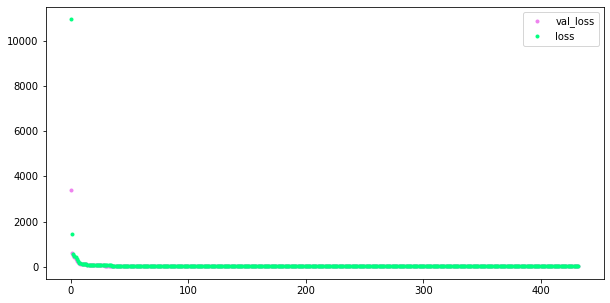

In [7]:
#1교시 그래프로 표현하기 사용 =============================
#y_vloss에 테스트셋으로 실험 결과의 오차값을 저장한다.
y_vloss = history.history['val_loss']

#y_acc에 학습셋으로 측정할 정확도의 값을 저장.
y_loss = history.history['loss']


#x값을 지정하고 정확도는 파란색 / 오차는 빨간색 으로 표현.
x_len = np.arange(len(y_loss)) #x축 길이를 설정하기 위해 실시.
plt.figure(figsize=(10,5) )

plt.plot(x_len, y_vloss, "o", c="violet", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="springgreen", markersize=3, label='loss')

plt.legend() #범례표기하도록 실시.
plt.show()
    
#모델 실행 및 저장
#model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer]) 

In [8]:
Y_prediction = model.predict(X_test).flatten() 
for i in range(10) :
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격 : {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격 : 19.400, 예상가격: 21.341
실제가격 : 10.900, 예상가격: 13.760
실제가격 : 34.700, 예상가격: 29.093
실제가격 : 15.600, 예상가격: 15.938
실제가격 : 22.600, 예상가격: 22.701
실제가격 : 29.000, 예상가격: 28.162
실제가격 : 23.800, 예상가격: 21.997
실제가격 : 45.400, 예상가격: 42.181
실제가격 : 50.000, 예상가격: 45.674
실제가격 : 26.700, 예상가격: 23.518
